In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

C:\Users\RD\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
# dimensions of our images.
img_width, img_height = 640, 360

train_data_dir = 'C:/Users/RD/Desktop/bigdata/test/train'
validation_data_dir = 'C:/Users/RD/Desktop/bigdata/test/validation'
nb_train_samples = 141
nb_validation_samples = 15
epochs = 30
batch_size = 2

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3)) #分3類
model.add(Activation('softmax')) #採用Softmax

model.compile(loss='categorical_crossentropy', #多分類
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') #多分類

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical') #多分類

train_history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save('C:/Users/RD/Desktop/bigdata/test/cnnmodel/cnnmodel.h5')


Found 141 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/30
70/70 [==============================] - 74s 1s/step - loss: 9.5994 - acc: 0.3714 - val_loss: 11.5129 - val_acc: 0.2857
Epoch 2/30
70/70 [==============================] - 66s 939ms/step - loss: 4.8152 - acc: 0.3429 - val_loss: 1.3330 - val_acc: 0.3571
Epoch 3/30
70/70 [==============================] - 63s 906ms/step - loss: 1.2873 - acc: 0.3429 - val_loss: 1.0899 - val_acc: 0.3571
Epoch 4/30
70/70 [==============================] - 73s 1s/step - loss: 1.1666 - acc: 0.3428 - val_loss: 1.0692 - val_acc: 0.2857
Epoch 5/30
70/70 [==============================] - 66s 944ms/step - loss: 1.1802 - acc: 0.3071 - val_loss: 0.9305 - val_acc: 0.5000
Epoch 6/30
70/70 [==============================] - 70s 995ms/step - loss: 1.0815 - acc: 0.4571 - val_loss: 0.8101 - val_acc: 0.7143
Epoch 7/30
70/70 [==============================] - 64s 910ms/step - loss: 1.1889 - acc: 0.4072 - val_loss: 0.8902 - val_acc: 

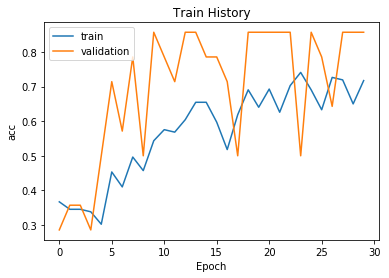

In [13]:
import matplotlib.pyplot as plt  

def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

show_train_history(train_history, 'acc', 'val_acc')

In [17]:
import numpy as np  
from keras.applications.imagenet_utils import decode_predictions  
from keras.preprocessing import image  
from keras.applications import *  
  
import os  
from keras.applications.inception_v3 import preprocess_input  
from keras.models import load_model  
  
file_path = 'C:/Users/RD/Desktop/bigdata/test/project/a4.png' # 新資料做預測
  
img = image.load_img(file_path, target_size=(640, 360))  
x = image.img_to_array(img)  
x = np.expand_dims(x, axis=0)  
x = preprocess_input(x)  
  
model = load_model('C:/Users/RD/Desktop/bigdata/test/cnnmodel/cnnmodel.h5')  
y = model.predict(x)  
y.round()

array([[0., 0., 1.]], dtype=float32)